In [1]:
import os
import sys
sys.path.insert(0, os.path.realpath('__file__'))

import numpy as np
import matplotlib.pyplot as plt
import pyEMA

The experiment is shown in the figure below; the beam was excited at 6 locations with a impact hammer, while the response was measured at 7 locations using piezo accelerometers (camera data is not used in this showcase; for image EMA, see https://github.com/ladisk/ImageBasedModalAnalysisTutorial):
<img width=500 src="./data/experiment_1.jpg">

Loading experimental data:

In [2]:
freq, H1_main = np.load("./data/acc_data.npy", allow_pickle=True)

Frequency vector was truncated for zero frequency:

In [3]:
freq[:10]

array([ 1.00019535,  2.0003907 ,  3.00058605,  4.0007814 ,  5.00097675,
        6.0011721 ,  7.00136745,  8.00156281,  9.00175816, 10.00195351])

And from the FRF (`H1_main` is of dimensions: #inputs, #outputs, frequency) only the response accelerometer position at index 1 will be later used:

In [4]:
selected_response = 1
FRF = H1_main[:,selected_response,:]

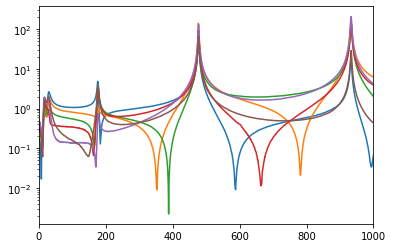

In [5]:
plt.semilogy(freq, np.abs(FRF.T));
plt.xlim(0,1000);

Initiate the pyEMA object:

In [6]:
acc = pyEMA.Model(frf=FRF, 
                 freq=freq,
                 lower=10, 
                 upper=5000,
                 pol_order_high=60)

Get the poles:

In [7]:
acc.get_poles()

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 332.78it/s]


Select stable poles from stabilisation chart:

In [8]:
acc.stab_chart(acc.all_poles, legend = True)

100%|██████████████████████████████████████████████████████████████| 60/60 [00:00<00:00, 142.86it/s]


SHIFT + LEFT mouse button to pick a pole.
SHIFT + RIGHT mouse button to erase the last pick.
1. Frequency: ~189 -->	176.06902152782865 Hz	(xi = 0.0088)
2. Frequency: ~471 -->	476.5109153408218 Hz	(xi = 0.0019)
3. Frequency: ~949 -->	932.2495455933974 Hz	(xi = 0.0015)
4. Frequency: ~1570 -->	1534.789519565158 Hz	(xi = 0.0020)
5. Frequency: ~2286 -->	2286.3113982276886 Hz	(xi = 0.0028)
6. Frequency: ~3153 -->	3161.8141139816153 Hz	(xi = 0.0025)
7. Frequency: ~4182 -->	4181.0190956623255 Hz	(xi = 0.0015)


<Figure size 432x288 with 0 Axes>

Alternatively to selecting from stabilisation chart, the frequencies can be defines as a list, e.g. (comment out to use):

In [9]:
#n_freq =  [176,476,932,1534,2258,3161,4180]
#acc.select_closest_poles(n_freq)

Reconstruction of FRF

In [10]:
frf_rec, modal_const = acc.get_constants(whose_poles='own', FRF_ind='all')

The selected natural frequencies and corresponding damping factors:

In [11]:
acc.print_modal_data()

   Nat. f.      Damping
-----------------------
1)  176.1	0.0088
2)  476.5	0.0019
3)  932.2	0.0015
4) 1534.8	0.0020
5) 2286.3	0.0028
6) 3161.8	0.0025
7) 4181.0	0.0015


Modal constants are of shape (`n_locations` $\times$ `n_frequencies`):

In [17]:
acc.A.shape

(6, 7)

In [18]:
acc.A[:, 0]

array([ 8.95992333-46.31010572j, -0.63045395 +7.36189946j,
       -3.81637801+32.01274032j, -7.93232643+31.3187765j ,
       -0.16328145 +4.18623334j,  9.93186303-34.47968048j])

Imaginary part of modal constants (first three):

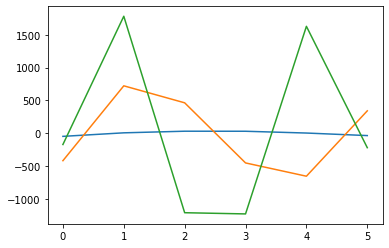

In [21]:
plt.plot(np.imag(acc.A[:, :3]));

Upper and lower residuals can also be called:

In [25]:
acc.UR, acc.LR

(array([-0.78948656+0.06933871j,  3.17322334-0.1514542j ,
        -1.11976307+0.17879541j,  0.53839389-0.08478995j,
         0.15763408+0.05740824j, -0.57097151-0.06338403j]),
 array([ 6521.08285743-4913.20319685j,   566.93414938-5684.75426788j,
          310.55870865-1147.45661644j,  1390.34262216-2514.83413642j,
        -1421.28135879 +366.50945083j, -6442.30965078 -167.27062418j]))

Check out the Auto Modal Assurance Criterion.

In [22]:
autoMAC = acc.autoMAC()

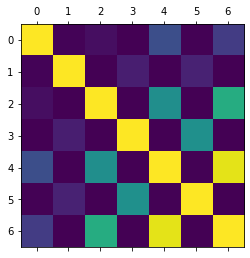

In [23]:
plt.matshow(autoMAC);

Showing the reconstructed FRF

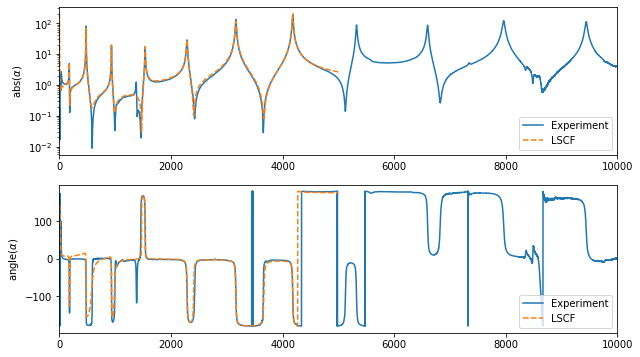

In [24]:
freq_a = acc.freq
select_loc = 0

plt.figure(figsize = ((10,6)))
plt.subplot(211)

plt.semilogy(freq, np.abs(FRF[select_loc]), label='Experiment')
plt.semilogy(freq_a, np.abs(frf_rec[select_loc]),'--', label='LSCF')
plt.xlim(0,freq[-1])
plt.ylabel(r"abs($\alpha$)")

plt.legend(loc = 'best')

plt.subplot(212)
plt.plot(freq, np.angle(FRF[select_loc],deg = 1), label='Experiment')
plt.plot(freq_a, np.angle(frf_rec[select_loc],deg = 1),'--',label='LSCF')
plt.xlim(0,freq[-1])

plt.ylabel(r"angle($\alpha$)")
plt.legend(loc = 'best');